## Libraries

Here I am going to use pytorch and librosa to read and manipulate audio files and matplotlib to plot.

In [2]:
import librosa
import torchaudio
import torch
import matplotlib.pyplot as plt

In [3]:
# matplotlib setup to work better with jupyter
%matplotlib inline
plt.ioff()

# use wider figures
plt.rcParams["figure.figsize"] = (20,3)

## Reading in Audio Data

The audio data in this example is my voice saying "Sally sells sea shells by the sea shore." Torchaudio's load function loads the data into a tensor, and normalizes the data into the range [-1.0,1.0]. It also extracts the sample rate which allows us to convert the sample index to a time value (in seconds).

In [4]:
data, sample_rate = torchaudio.load('audio_data.wav')
print(data, sample_rate)

tensor([[ 0.0303,  0.0304,  0.0275,  ..., -0.0466, -0.0338, -0.0416]]) 44100


## Waveforms

The simplest way to view audio data is to look directly at the waveform. This can be done by simply plotting the audio data. For this example, this is done with matplotlib

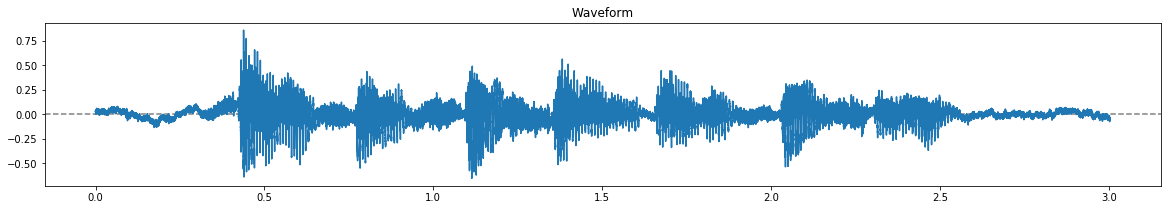

In [5]:
def get_axes(data,sample_rate):
    """
    Returns the number of samples, the squeezed data tensor, and time steps in seconds 
    """
    
    # Get the size of the data tensor
    size = data.size(-1)
    
    # Torch by default loads the data as a [1,num_samples] tensor, this corrects for that
    data = data.view(-1)
    
    # Get the x-axis values and divide by the sample rate to convert to seconds
    seconds = torch.arange(size)/sample_rate
    
    return size,data,seconds

def plot_waveform(data,sample_rate,title=None):
    """
    Plots a waveform given the sample data
    args:
        - data
            The waveform data, expected to be a tensor
        - sample_rate
            The sample rate of the original sound file
    """
    
    # Get the correct data to plot this waveform
    size,data,seconds = get_axes(data, sample_rate)
    
    # Draw a line at y=0 for reference and plot the data
    plt.axhline(y=0,linestyle="--", color="gray")
    if title:
        plt.title(title)
    plt.plot(torch.arange(size)/sample_rate, data)
    plt.show()
    

plot_waveform(data,sample_rate,"Waveform")

## Spectrograms

Spectrograms give insight into some of the acoustic and linguistic properties of sound. For instance, they show if the sound is voiced or unvoiced, vowel formants, stop closures, etc. We can use windows of varying length to show more or less frequency information in the spectrogram. Using a wider window will show the harmonics in better detail, while a narrower window will show only general formant information. The spectrograms below use the Hanning window function, and I cut off the y-axis at 8000Hz.

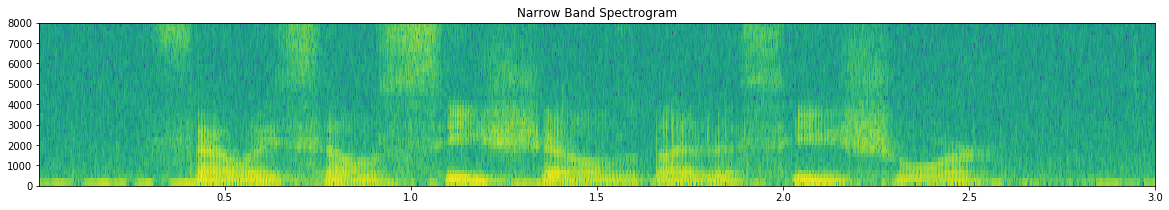

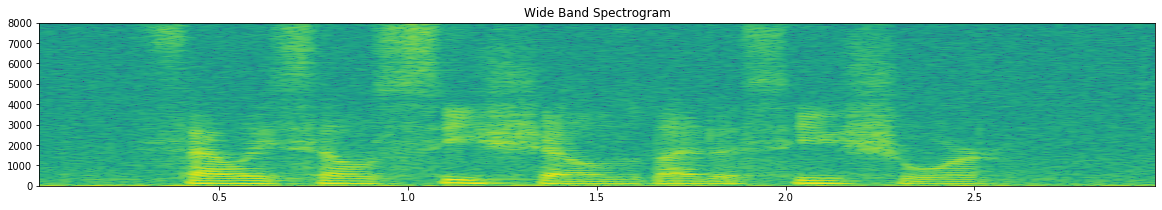

In [6]:
def plot_spectrogram(data,sample_rate,window_size=0.005, window_offset=0.0035,title=None):
    """
    Plots the spectrogram of a given waveform
    args:
        - data
            The waveform data, expected to be a tensor
        - sample_rate
            The sample rate of the original sound file
        - window_size
            The size of the window use to construct the spectrogram, expected to be in seconds
            defaults to 0.005s
    """
    
    # Get the correct data to plot this waveform
    size, data, seconds = get_axes(data, sample_rate)

    # Convert the window size from seconds to number of samples 
    # This must be an integer to plot properly
    window_size = int(sample_rate * window_size)
    
    # Convert the window offset from seconds to sample number
    window_offset = int(window_offset * sample_rate)
    
    # Allowing the window offset to be > window size would miss some data
    assert window_offset <= window_size, "Window off set must be <= window size!"
    
    # Plot the spectrogram
    plt.specgram(data, Fs=sample_rate, NFFT=window_size, noverlap=window_size-64)
    plt.ylim(0,8000)
    if title:
        plt.title(title)
    plt.show()
    
# Show narrow band spectrogram
plot_spectrogram(data, sample_rate,0.005, title="Narrow Band Spectrogram")

# Show wide band spectrogram
plot_spectrogram(data, sample_rate,0.05, title="Wide Band Spectrogram")